# Imports / Training

In [ ]:
# Author: Michela Francesconi
# Train and compare the differences in the MLP and CNN models

import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import layers, models, optimizers, utils, datasets

NUM_CLASSES = 10
# Trains the models
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

y_train = utils.to_categorical(y_train, NUM_CLASSES)
y_test = utils.to_categorical(y_test, NUM_CLASSES)

# MLP

In [ ]:
# Create the MLP model
def create_mlp_model(input_shape):
  input_layer = layers.Input((32, 32, 3))

  model = models.Sequential([
      layers.Flatten(input_shape=input_shape),
      layers.Dense(200, activation="relu"),
      layers.Dense(150, activation="relu"),
      layers.Dense(NUM_CLASSES, activation="softmax")
  ])

  model.summary()

  opt = optimizers.Adam(learning_rate=0.0005)
  model.compile(
    loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"]
)
  mlp_history = model.fit(x_train, y_train, batch_size=32, epochs=10, shuffle=True)

# Evaluate the model
  model.evaluate(x_test, y_test)

  CLASSES = np.array(
    [
        "airplane",
        "automobile",
        "bird",
        "cat",
        "deer",
        "dog",
        "frog",
        "horse",
        "ship",
        "truck",
    ]
  )
#predictions from the model and the actaul classification of the image
  preds = model.predict(x_test)
  preds_single = CLASSES[np.argmax(preds, axis=-1)]
  actual_single = CLASSES[np.argmax(y_test, axis=-1)]

  n_to_show = 10
  indices = np.random.choice(range(len(x_test)), n_to_show)

  fig = plt.figure(figsize=(15, 3))
  fig.subplots_adjust(hspace=0.4, wspace=0.4)

  for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i + 1)
    ax.axis("off")
    ax.text(
        0.5,
        -0.35,
        "pred = " + str(preds_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.text(
        0.5,
        -0.7,
        "act = " + str(actual_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.imshow(img)
  # Plot the Accuracy
  plt.subplot(1, 2, 1)
  plt.plot(mlp_history.history['accuracy'], label = 'Train Accuracy')
  plt.title('Model Accuracy')
  plt.ylabel('Epoch')
  plt.xlabel('Accuracy')
  plt.legend(['MLP'], loc='upper left')
  plt.show()

# Plot the Loss
  plt.subplot(1, 2, 1)
  plt.plot(mlp_history.history['loss'], label = 'Train Loss')
  plt.title('Model Loss')
  plt.ylabel('Epoch')
  plt.xlabel('Loss')
  plt.legend(['MLP'], loc='upper left')
  plt.show()

# CNN

In [ ]:
def create_cnn_model(input_shape):
  model = models.Sequential()

# Input layer
  input_layer = layers.Input((32, 32, 3))

# The first COV2D layer
# Output shape: (32, 32, 32)
  x = layers.Conv2D(filters=32, kernel_size=3, strides=1, padding="same")(
    input_layer
  )
  x = layers.BatchNormalization()(x)
  x = layers.LeakyReLU()(x)

# The second COV2D layer
# Output shape: (16, 16, 32)
  x = layers.Conv2D(filters=32, kernel_size=3, strides=2, padding="same")(x)
  x = layers.BatchNormalization()(x)
  x = layers.LeakyReLU()(x)


# The third COV2D layer
# Output shape: (16, 16, 64)
  x = layers.Conv2D(filters=64, kernel_size=3, strides=1, padding="same")(x)
  x = layers.BatchNormalization()(x)
  x = layers.LeakyReLU()(x)


# The fourth COV2D layer
# Output shape: (8, 8, 64)
  x = layers.Conv2D(filters=64, kernel_size=3, strides=2, padding="same")(x)
  x = layers.BatchNormalization()(x)
  x = layers.LeakyReLU()(x)

# Output shape: (4096)
# Flattens the 8x8x64 tensor into a 4096-dimensional vector.
  x = layers.Flatten()(x)

# Output shape: (128)
# Fully connected layer with 128 units

  x = layers.Dense(128)(x)
  x = layers.BatchNormalization()(x)
  x = layers.LeakyReLU()(x)
  x = layers.Dropout(rate=0.5)(x)

  x = layers.Dense(NUM_CLASSES)(x)
  output_layer = layers.Activation("softmax")(x)

# Add all layers to the model
  model = models.Sequential([
      input_layer,
      layers.Conv2D(filters=32, kernel_size=3, strides=1, padding="same"),
      layers.BatchNormalization(),
      layers.LeakyReLU(),
      layers.Conv2D(filters=32, kernel_size=3, strides=2, padding="same"),
      layers.BatchNormalization(),
      layers.LeakyReLU(),
      layers.Conv2D(filters=64, kernel_size=3, strides=1, padding="same"),
      layers.BatchNormalization(),
      layers.LeakyReLU(),
      layers.Conv2D(filters=64, kernel_size=3, strides=2, padding="same"),
      layers.BatchNormalization(),
      layers.LeakyReLU(),
      layers.Flatten(),
      layers.Dense(128),
      layers.BatchNormalization(),
      layers.LeakyReLU(),
      layers.Dropout(rate=0.5),
      layers.Dense(NUM_CLASSES),
      layers.Activation("softmax")
  ])

  model.summary()

  opt = optimizers.Adam(learning_rate=0.0005)
  model.compile(
    loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"]
  )

  cnn_history = model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=10,
    shuffle=True,
    validation_data=(x_test, y_test),
)
# Evaluate the model
  model.evaluate(x_test, y_test, batch_size=1000)

  CLASSES = np.array(
    [
        "airplane",
        "automobile",
        "bird",
        "cat",
        "deer",
        "dog",
        "frog",
        "horse",
        "ship",
        "truck",
    ]
  )
#predictions from the model and the actaul classification of the image
  preds = model.predict(x_test)
  preds_single = CLASSES[np.argmax(preds, axis=-1)]
  actual_single = CLASSES[np.argmax(y_test, axis=-1)]

  n_to_show = 10
  indices = np.random.choice(range(len(x_test)), n_to_show)

  fig = plt.figure(figsize=(15, 3))
  fig.subplots_adjust(hspace=0.4, wspace=0.4)

  for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i + 1)
    ax.axis("off")
    ax.text(
        0.5,
        -0.35,
        "pred = " + str(preds_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.text(
        0.5,
        -0.7,
        "act = " + str(actual_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.imshow(img)
# Plot the Accuracy of the CNN
  plt.subplot(1, 2, 1)
  plt.plot(cnn_history.history['accuracy'], label = 'Train Accuracy')
  plt.title('Model Accuracy')
  plt.ylabel('Epoch')
  plt.xlabel('Accuracy')
  plt.legend(['CNN'], loc='upper left')
  plt.show()

# Plot the Loss of the CNN
  plt.subplot(1, 2, 1)
  plt.plot(cnn_history.history['loss'], label = 'Train Loss')
  plt.title('Model Loss')
  plt.ylabel('Epoch')
  plt.xlabel('Loss')
  plt.legend(['CNN'], loc='upper left')
  plt.show()

# Running

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_12 (Flatten)        (None, 3072)              0         
                                                                 
 dense_30 (Dense)            (None, 200)               614600    
                                                                 
 dense_31 (Dense)            (None, 150)               30150     
                                                                 
 dense_32 (Dense)            (None, 10)                1510      
                                                                 
Total params: 646260 (2.47 MB)
Trainable params: 646260 (2.47 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.8406 - accuracy: 0.3360
Epoch 2/10
1563/1563 [=========================

<ipython-input-29-914ee7e46c5b>:68: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


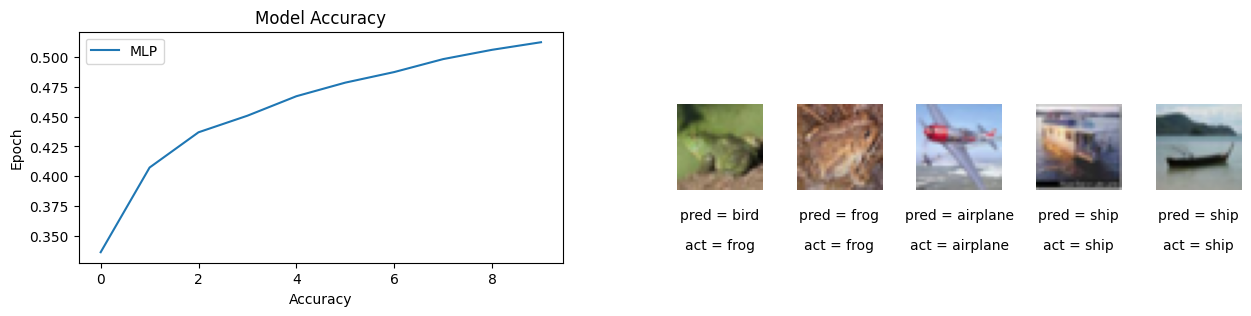

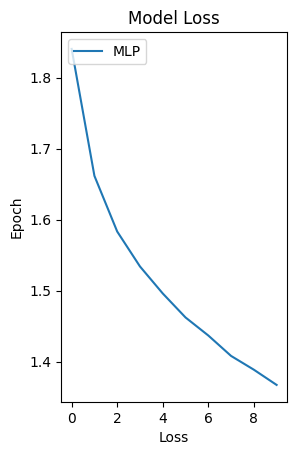

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_35 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 leaky_re_lu_35 (LeakyReLU)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_29 (Conv2D)          (None, 16, 16, 32)        9248      
                                                                 
 batch_normalization_36 (Ba  (None, 16, 16, 32)        128       
 tchNormalization)                                               
                                                                 
 leaky_re_lu_36 (LeakyReLU)  (None, 16, 16, 32)      

<ipython-input-30-955cfe72d3b7>:138: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


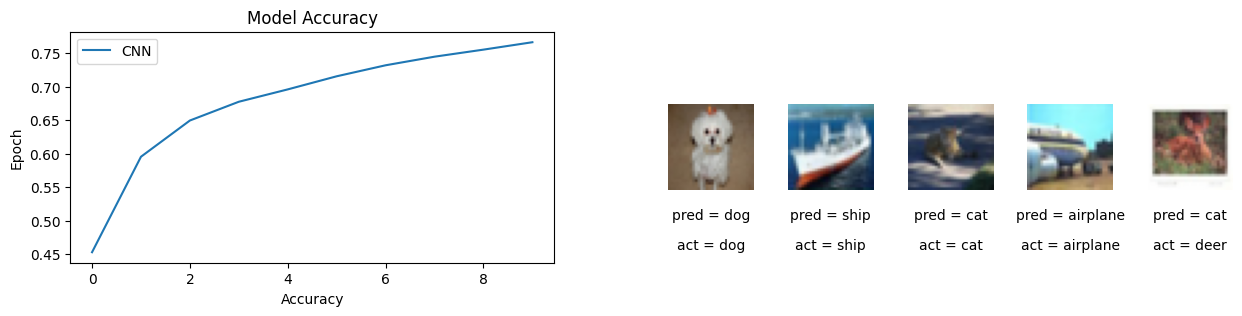

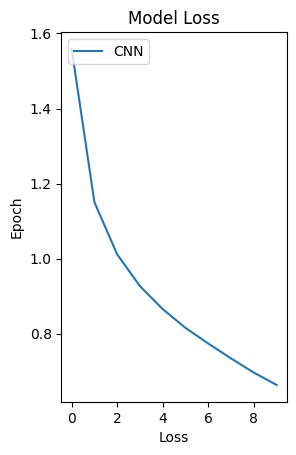

In [ ]:
create_mlp_model(input_shape=(32, 32, 3))

create_cnn_model(input_shape=(32, 32, 3))